In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load the dataset

df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


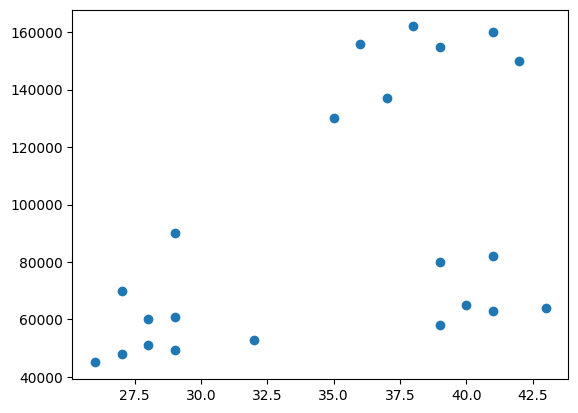

In [8]:
plt.scatter(df.Age, df['Income($)'])
plt.show()

In [9]:
#Clustering

km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [10]:
df['Cluster1'] = y_pred
df

,Name,Age,Income($),Cluster1
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [11]:
km.cluster_centers_

array([[3.63333333e+01, 8.40000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04]])

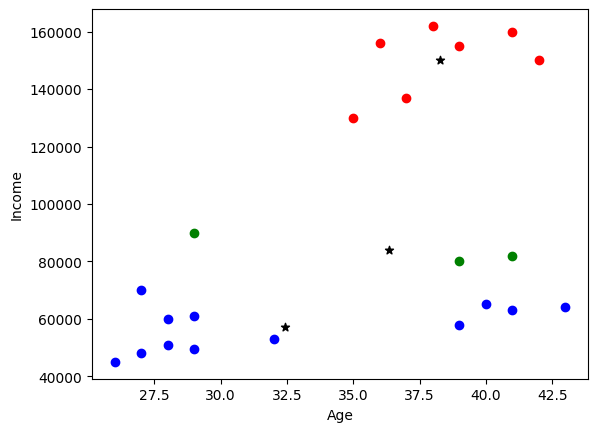

In [14]:
df0 = df[df.Cluster1==0]
df1 = df[df.Cluster1==1]
df2 = df[df.Cluster1==2]

plt.scatter(df0.Age, df0['Income($)'], color='green')
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')



a= km.cluster_centers_
plt.scatter(a[:,0], a[:,1], color='black',marker='*',label = 'Centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [15]:
# we observed a scaling issue ,we'll solve it

scaler = MinMaxScaler()

# scaling income
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# scaling Age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [16]:
df

,Name,Age,Income($),Cluster1
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


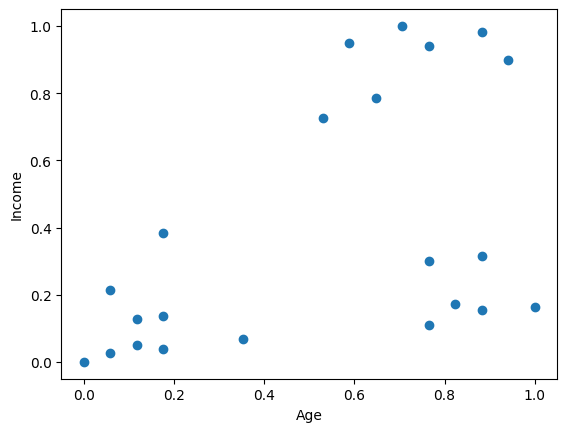

In [18]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [19]:
km1 = KMeans(n_clusters=3)
y_pred1 = km1.fit_predict(df[['Age', 'Income($)']])
y_pred1

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [22]:
df['Cluster2'] = y_pred1
df

,Name,Age,Income($),Cluster1,Cluster2
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


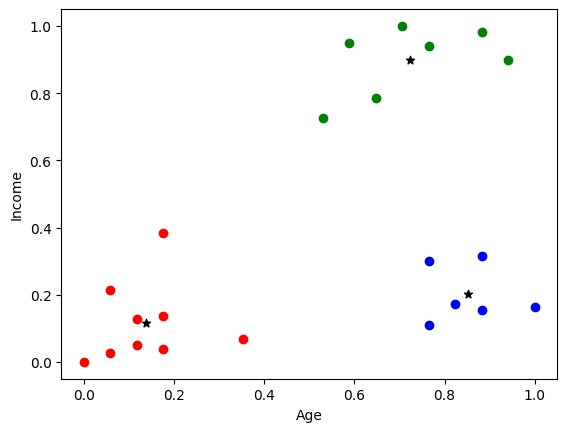

In [23]:
# Again plotting the scatter plot

df0 = df[df.Cluster2==0]
df1 = df[df.Cluster2==1]
df2 = df[df.Cluster2==2]

plt.scatter(df0.Age, df0['Income($)'], color='green')
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')



a= km1.cluster_centers_
plt.scatter(a[:,0], a[:,1], color='black',marker='*',label = 'Centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [24]:
# Load the data again for the client

df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [26]:
#Red >> 0
# Green >> 1
# Blue >> 2

df['Group'] = y_pred1
df

,Name,Age,Income($),Group
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [28]:
df['Group'] = df['Group'].map({0:'Young Poor',1:'Old Rich',2:'Old Poor'})
df

,Name,Age,Income($),Group
0,Rob,27,70000,Old Rich
1,Michael,29,90000,Old Rich
2,Mohan,29,61000,Old Rich
3,Ismail,28,60000,Old Rich
4,Kory,42,150000,Young Poor
5,Gautam,39,155000,Young Poor
6,David,41,160000,Young Poor
7,Andrea,38,162000,Young Poor
8,Brad,36,156000,Young Poor
9,Angelina,35,130000,Young Poor
